In [267]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

## Data Wrangling

In [268]:
data=pd.read_csv("SPY_daily.csv")
data.rename(columns={"1. open":"open","2. high":"high","3. low":"low","4. close":"close","5. volume":"volume"}, inplace=True)
data

,date,open,high,low,close,volume
0,2020-11-16,360.9800,362.7800,359.5900,362.5700,72203007.0
1,2020-11-13,355.2700,358.9000,354.7100,358.1000,62959429.0
2,2020-11-12,355.5800,356.7182,351.2600,353.2100,68118563.0
3,2020-11-11,356.4000,357.5600,355.0600,356.6700,58649048.0
4,2020-11-10,353.4900,355.1800,350.5100,354.0400,85552022.0
...,...,...,...,...,...,...
5291,1999-11-05,138.6250,139.1093,136.7812,137.8750,7431500.0
5292,1999-11-04,136.7500,137.3593,135.7656,136.5312,7907500.0
5293,1999-11-03,136.0000,136.3750,135.1250,135.5000,7222300.0
5294,1999-11-02,135.9687,137.2500,134.5937,134.5937,6516900.0


In [269]:
# Flipping the dataset
data = data[::-1].reset_index(drop=True)
data

,date,open,high,low,close,volume
0,1999-11-01,136.5000,137.0000,135.5625,135.5625,4006500.0
1,1999-11-02,135.9687,137.2500,134.5937,134.5937,6516900.0
2,1999-11-03,136.0000,136.3750,135.1250,135.5000,7222300.0
3,1999-11-04,136.7500,137.3593,135.7656,136.5312,7907500.0
4,1999-11-05,138.6250,139.1093,136.7812,137.8750,7431500.0
...,...,...,...,...,...,...
5291,2020-11-10,353.4900,355.1800,350.5100,354.0400,85552022.0
5292,2020-11-11,356.4000,357.5600,355.0600,356.6700,58649048.0
5293,2020-11-12,355.5800,356.7182,351.2600,353.2100,68118563.0
5294,2020-11-13,355.2700,358.9000,354.7100,358.1000,62959429.0


In [270]:
data=data.drop("date", axis=1)
data

,open,high,low,close,volume
0,136.5000,137.0000,135.5625,135.5625,4006500.0
1,135.9687,137.2500,134.5937,134.5937,6516900.0
2,136.0000,136.3750,135.1250,135.5000,7222300.0
3,136.7500,137.3593,135.7656,136.5312,7907500.0
4,138.6250,139.1093,136.7812,137.8750,7431500.0
...,...,...,...,...,...
5291,353.4900,355.1800,350.5100,354.0400,85552022.0
5292,356.4000,357.5600,355.0600,356.6700,58649048.0
5293,355.5800,356.7182,351.2600,353.2100,68118563.0
5294,355.2700,358.9000,354.7100,358.1000,62959429.0


**Scaling the Data**

In [272]:
# Scaling all the training data
MinMaxScaler = preprocessing.MinMaxScaler()  # MinMaxScaler == data_normaliser
X = MinMaxScaler.fit_transform(data) # X == data_normalized

In [271]:
history_points=50
column=3

In [273]:
# Building normalised training data in segments of 50x5
# Get the normalised next day open data
historical_data_normalised =      np.array([X[i  : i + history_points].copy() for i in range(len(X) - history_points)])
next_day_close_values_normalised = np.array([X[:,column][i + history_points].copy() for i in range(len(X) - history_points)])
next_day_close_values_normalised = np.expand_dims(next_day_close_values_normalised, -1)

In [274]:
historical_data_normalised[0]

array([[0.23157219, 0.22759698, 0.23406783, 0.22907186, 0.0044045 ],
       [0.22977738, 0.22844623, 0.23075558, 0.22578177, 0.00728718],
       [0.22988312, 0.22547388, 0.23257205, 0.22885961, 0.00809719],
       [0.23241673, 0.22881751, 0.23476221, 0.23236161, 0.008884  ],
       [0.23875076, 0.23476221, 0.23823447, 0.23692522, 0.00833741],
       [0.23326127, 0.23226782, 0.2381278 , 0.23734972, 0.00514251],
       [0.23832849, 0.23332937, 0.23652501, 0.23294539, 0.00500988],
       [0.23072765, 0.23232081, 0.23583063, 0.23639442, 0.00715938],
       [0.23727282, 0.23269244, 0.24058498, 0.23904775, 0.0053089 ],
       [0.2408621 , 0.23773456, 0.23940989, 0.24329281, 0.01335708],
       [0.24286771, 0.23863714, 0.24720914, 0.24440705, 0.00231575],
       [0.24529593, 0.2479788 , 0.24955964, 0.24838688, 0.00846752],
       [0.25099655, 0.24776649, 0.25372662, 0.2496604 , 0.01066558],
       [0.25162996, 0.2479788 , 0.25479504, 0.25305644, 0.00496085],
       [0.25152422, 0.24787248, 0.

In [275]:
next_day_close_values_normalised[0]

array([0.25454221])

In [276]:
# Retriving the real next day open values
next_day_close_values = np.array([data.iloc[:,column][i + history_points].copy() for i in range(len(data) - history_points)])
# Expanding the dimentions of next_day_open_values_normalised (5246, 1, 1)
unscaled_y = np.expand_dims(next_day_close_values, -1)
unscaled_y

array([[143.0625],
       [145.    ],
       [146.9687],
       ...,
       [353.21  ],
       [358.1   ],
       [362.57  ]])

In [277]:
y_normaliser = preprocessing.MinMaxScaler()
y_normaliser.fit(unscaled_y)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [278]:
assert historical_data_normalised.shape[0] == next_day_open_values_normalised.shape[0]

**Creating final datasets**

In [279]:
test_split = 0.9 # percent of data to be used for testing
n = int(historical_data_normalised.shape[0] * test_split)

# splitting the dataset up into train and test sets

X_train = historical_data_normalised[:n]
y_train = next_day_close_values_normalised[:n]

X_test = historical_data_normalised[n:]
y_test = next_day_close_values_normalised[n:]

unscaled_y_test = unscaled_y[n:]

## Buildling the Model

In [280]:
import keras
import tensorflow as tf
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate
from keras import optimizers
import numpy as np
np.random.seed(4)
tf.random.set_seed(4)

lstm_input = Input(shape=(history_points, 5), name='lstm_input')
x = LSTM(50, name='lstm_0')(lstm_input)
x = Dropout(0.2, name='lstm_dropout_0')(x)
x = Dense(64, name='dense_0')(x)
x = Activation('sigmoid', name='sigmoid_0')(x)
x = Dense(1, name='dense_1')(x)
output = Activation('linear', name='linear_output')(x)
model = Model(inputs=lstm_input, outputs=output)

adam = optimizers.Adam(lr=0.0005)

model.compile(optimizer=adam, loss='mse')

In [221]:
model.fit(X_train, y_train, batch_size=32, epochs=50, shuffle=True, validation_split=0.1)
evaluation = model.evaluate(X_test, y_test)
print(f"Test Loss:{evaluation}")

Epoch 1/50
133/133 [==============================] - 3s 24ms/step - loss: 0.0126 - val_loss: 0.0054
Epoch 2/50
133/133 [==============================] - 3s 21ms/step - loss: 4.5826e-04 - val_loss: 0.0039
Epoch 3/50
133/133 [==============================] - 3s 21ms/step - loss: 3.3209e-04 - val_loss: 0.0034
Epoch 4/50
133/133 [==============================] - 3s 23ms/step - loss: 2.6938e-04 - val_loss: 0.0019
Epoch 5/50
133/133 [==============================] - 3s 21ms/step - loss: 2.4709e-04 - val_loss: 9.7026e-04
Epoch 6/50
133/133 [==============================] - 3s 23ms/step - loss: 2.1297e-04 - val_loss: 0.0016
Epoch 7/50
133/133 [==============================] - 3s 23ms/step - loss: 2.1222e-04 - val_loss: 0.0016
Epoch 8/50
133/133 [==============================] - 3s 22ms/step - loss: 2.0886e-04 - val_loss: 2.7907e-04
Epoch 9/50
133/133 [==============================] - 3s 20ms/step - loss: 1.9430e-04 - val_loss: 8.1072e-04
Epoch 10/50
133/133 [==========================

**MSE of the normalized dataset**

In [222]:
y_test_predicted = model.predict(X_test)
# # # model.predict returns normalised values
# # # now we scale them back up using the y_scaler from before
y_test_predicted = y_normaliser.inverse_transform(y_test_predicted)

# # # also getting predictions for the entire dataset, just to see how it performs
y_train_predicted = model.predict(X_train)
y_train_predicted = y_normaliser.inverse_transform(y_train_predicted)

# assert unscaled_y_test.shape == y_test_predicted.shape
real_mse = np.mean(np.square(unscaled_y_test - y_test_predicted))
scaled_mse = real_mse / (np.max(unscaled_y_test) - np.min(unscaled_y_test)) * 100
print(f"Scaled MSE: {scaled_mse}")

Scaled MSE: 18.375368443758436


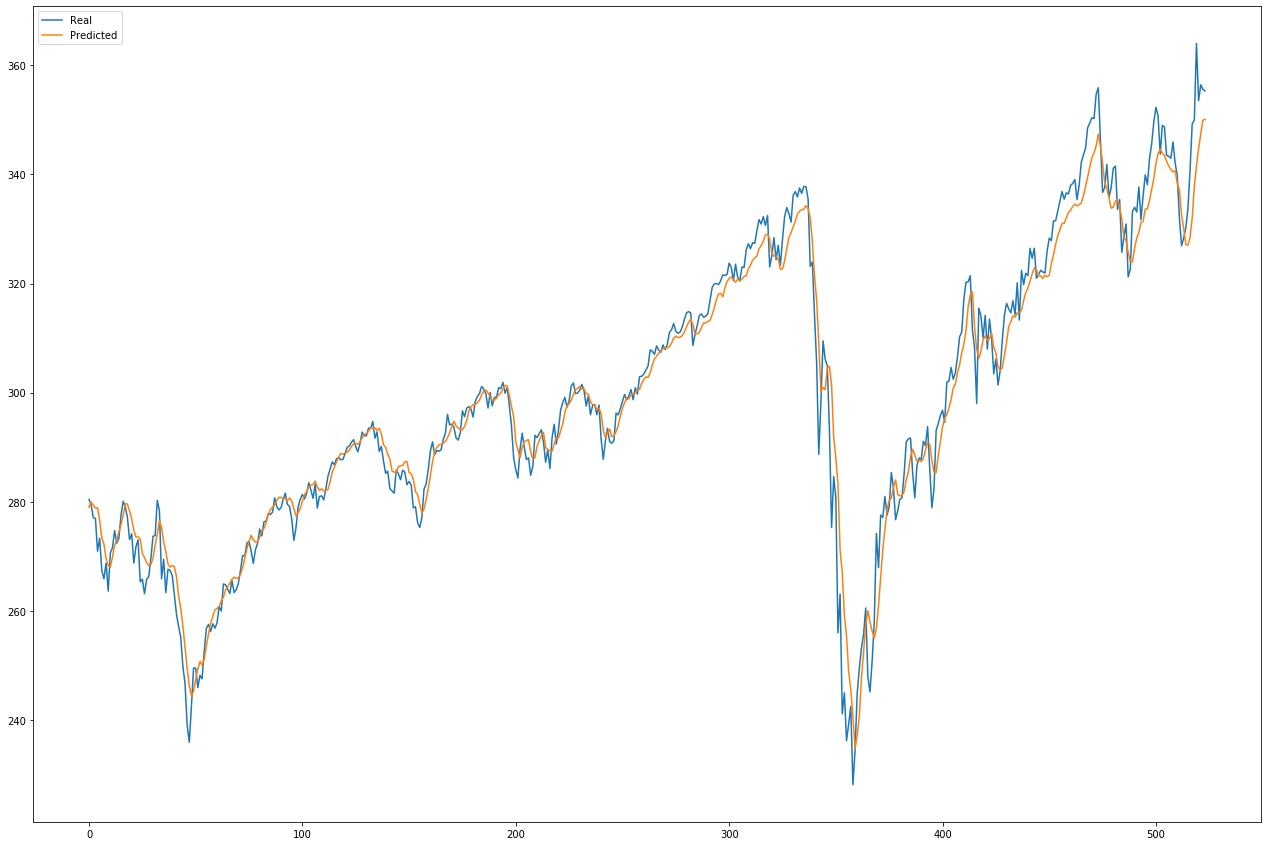

In [223]:
import matplotlib.pyplot as plt
plt.gcf().set_size_inches(22, 15, forward=True)

start = 0
end = -1

real = plt.plot(unscaled_y_test[start:end], label='real')
pred = plt.plot(y_test_predicted[start:end], label='predicted')

plt.legend(['Real', 'Predicted'])

plt.show()

## Making predictions

In [224]:
data[-2:]

,open,high,low,close,volume
5294,355.27,358.90,354.71,358.10,62959429.0
5295,360.98,362.78,359.59,362.57,72203007.0


In [225]:
# Predicting today
d=data[-51:-1]
normalized_data=MinMaxScaler.fit_transform(d)
today=model.predict(np.expand_dims(normalized_data, 0))
today=y_normaliser.inverse_transform(today)
today

array([[338.1678]], dtype=float32)

In [226]:
# Predicting tomorrow
d=data[-50:]
normalized_data=MinMaxScaler.fit_transform(data)
tomorrow=model.predict(np.expand_dims(normalized_data, 0))
tomorrow=y_normaliser.inverse_transform(tomorrow)
tomorrow

array([[333.0207]], dtype=float32)

In [ ]:
# # Predicting next day
# d=data[-49:]

# normalized_data=MinMaxScaler.fit_transform(d)
# tomorrow=model.predict(np.expand_dims(normalized_data, 0))
# next_day=y_normaliser.inverse_transform(next_day)
# next_day

In [227]:
model.save("predict_next_day_open.h5")

## Loading Saved Models

In [228]:
from keras.models import load_model

close_model=load_model('built_models/predict_next_day_close.h5')
open_model=load_model('built_models/predict_next_day_open.h5')
high_model=load_model('built_models/predict_next_day_high.h5')
low_model=load_model('built_models/predict_next_day_low.h5')
volume_model=load_model('built_models/predict_next_day_volume.h5')

In [ ]:
# Predicting today
d=data[-51:-1]
normalized_data=MinMaxScaler.fit_transform(d)
today=model.predict(np.expand_dims(normalized_data, 0))
today=y_normaliser.inverse_transform(today)
today

#### Create volume scaler
#### Create way to scale predicted values to real values

In [248]:
# Predicting tomorrow
d=data[-50:]
normalized_data=MinMaxScaler.fit_transform(d)
tom_open=open_model.predict(np.expand_dims(normalized_data, 0))
tom_close=close_model.predict(np.expand_dims(normalized_data, 0))
tom_high=high_model.predict(np.expand_dims(normalized_data, 0))
tom_low=low_model.predict(np.expand_dims(normalized_data, 0))
tom_volume=volume_model.predict(np.expand_dims(normalized_data, 0))

open_=y_normaliser.inverse_transform(tom_open)
close_=y_normaliser.inverse_transform(tom_close)
high_=y_normaliser.inverse_transform(tom_high)
low_=y_normaliser.inverse_transform(tom_low)
volume_=y_normaliser.inverse_transform(tom_volume)
print(open_, close_, high_, low_, volume_)

[[333.0207]] [[334.14026]] [[328.9558]] [[339.87247]] [[1.2203836e+08]]


In [266]:
# Building new 
new_row=pd.DataFrame({
    "open":open_[0][0],
    "high":high_[0][0],
    "low":low_[0][0],
    "close":close_[0][0],
    "volume":volume_[0][0]
}, index=[((max(data.index)+1))])

In [ ]:
# Scale new row to match real prices

In [265]:
# Adding predicted data to datset
data.append(new_row)

,open,high,low,close,volume
0,136.500000,137.000000,135.562500,135.562500,4006500.0
1,135.968700,137.250000,134.593700,134.593700,6516900.0
2,136.000000,136.375000,135.125000,135.500000,7222300.0
3,136.750000,137.359300,135.765600,136.531200,7907500.0
4,138.625000,139.109300,136.781200,137.875000,7431500.0
...,...,...,...,...,...
5292,356.400000,357.560000,355.060000,356.670000,58649048.0
5293,355.580000,356.718200,351.260000,353.210000,68118563.0
5294,355.270000,358.900000,354.710000,358.100000,62959429.0
5295,360.980000,362.780000,359.590000,362.570000,72203007.0


In [ ]:
# How to scale the new row
